# RNN(LSTM)

Here we will forecast the future of inflation using RNN(LSTM).

### 1. Preparing the datasets & Importing neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [ ]:
!git clone https://github.com/farelarden/Dicoding-Capstone-ML.git

fatal: destination path 'Dicoding-Capstone-ML' already exists and is not an empty directory.


In [ ]:
df_Makanan = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Makanan.csv',index_col='BULAN')
df_Minuman = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Minuman.csv',index_col='BULAN')
df_Rumah = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 03 - Rumah.csv',index_col='BULAN')
df_Sandang = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 04 - Sandang.csv',index_col='BULAN')
df_Transportasi = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 07 - Transportasi.csv',index_col='BULAN')

In [ ]:
df_Makanan.index.freq='MS'

In [ ]:
df_Makanan = df_Makanan[['KOTA MEULABOH']]

In [ ]:
df_Makanan.head()

,KOTA MEULABOH
BULAN,
2014-01-01,1.10
2014-02-01,0.88
2014-03-01,1.42
2014-04-01,0.17
2014-05-01,-0.01


In [ ]:
df_Makanan.shape

(94, 1)

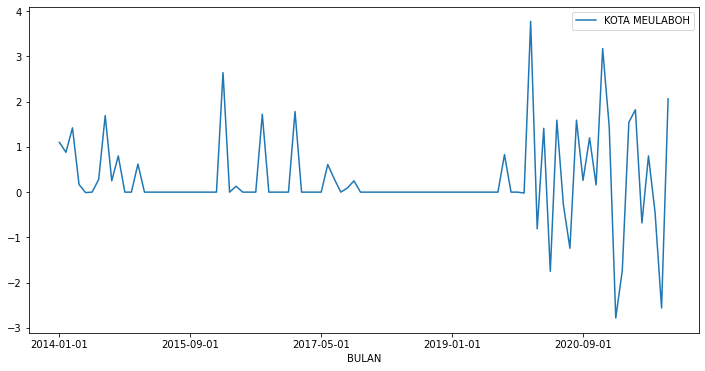

In [ ]:
df_Makanan.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
train = df_Makanan.iloc[:math.ceil(df_Makanan.shape[0]*0.8)]
test = df_Makanan.iloc[math.ceil(df_Makanan.shape[0]*0.8):]

In [ ]:
train

,KOTA MEULABOH
BULAN,
2014-01-01,1.10
2014-02-01,0.88
2014-03-01,1.42
2014-04-01,0.17
2014-05-01,-0.01
...,...
2019-12-01,-0.02
2020-01-01,3.77
2020-02-01,-0.81


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train[:10]

array([[0.51630435],
       [0.47644928],
       [0.57427536],
       [0.34782609],
       [0.31521739],
       [0.31702899],
       [0.36775362],
       [0.62318841],
       [0.36231884],
       [0.46195652]])

In [ ]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.51630435 0.47644928 0.57427536 0.34782609 0.31521739 0.31702899
 0.36775362 0.62318841 0.36231884 0.46195652 0.31702899 0.31702899]
Predict this y: 
 [[0.42934783]]


In [ ]:
X.shape

(1, 12, 1)

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit(generator,epochs=85)

Epoch 1/85
64/64 [==============================] - 2s 6ms/step - loss: 0.0410
Epoch 2/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 3/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0198
Epoch 4/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0198
Epoch 5/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 6/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 7/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0186
Epoch 8/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 9/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0182
Epoch 10/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 11/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 12/85
64/64 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 13/85
64/64 [==============================

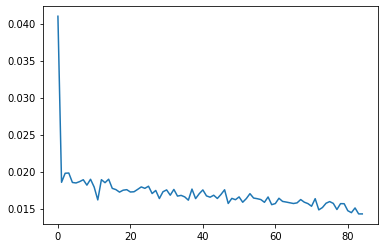

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

array([[0.59165525]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.60507246])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test['Prediction']=test_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.head()

,KOTA MEULABOH,Prediction
BULAN,,
2020-05-01,1.59,[0.59165525]
2020-06-01,-0.28,[-0.013227038]
2020-07-01,-1.24,[0.6581051]
2020-08-01,1.59,[-0.091170944]
2020-09-01,0.26,[0.7409727]


In [ ]:
test.dtypes

KOTA MEULABOH    float64
Prediction        object
dtype: object

In [ ]:
test['Prediction'] = test['Prediction'].astype(float, errors = 'raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.dtypes

KOTA MEULABOH    float64
Prediction       float64
dtype: object

In [ ]:
test.head()

,KOTA MEULABOH,Prediction
BULAN,,
2020-05-01,1.59,0.591655
2020-06-01,-0.28,-0.013227
2020-07-01,-1.24,0.658105
2020-08-01,1.59,-0.091171
2020-09-01,0.26,0.740973


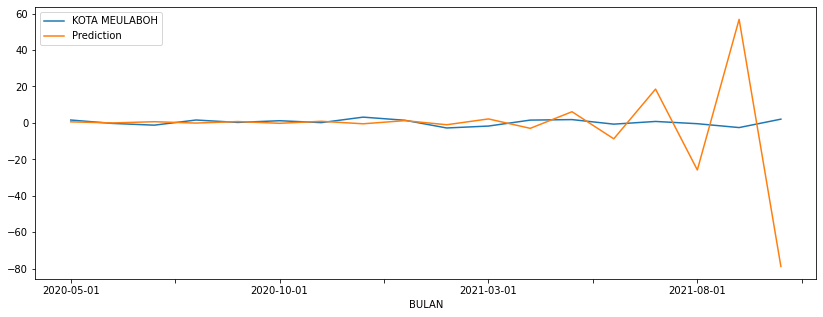

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=mean_squared_error(test['KOTA MEULABOH'],test['Prediction'])
print(rmse)

620.8211331220764
